# Train on one dataset and test on the rest

# modules and functions

In [312]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [313]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
#mport scikitplot as skplt
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN

In [314]:
filenames=[]
samples=[]
for i in os.listdir("/project/ReadStatistics-data/cancer_processing/"):
    print(i)
    if len(i)==10 and i!="SRR8670684":
        filenames.append("/project/ReadStatistics-data/cancer_processing/"+i+"/FinalFile.csv")
        samples.append(i)

SRR8788980
SRR8670672
SRR8670685
SRR8670673
SRR8670680
SRR8670683
SRR8670684
SRR8670697
SRR8670721
.ipynb_checkpoints
SRR8670670
Homo_sapiens_assembly19.fasta
DL_CANCER.ipynb
results_viewer.pdf


In [317]:
filenames

['/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670673/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670680/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670683/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670697/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670721/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670670/FinalFile.csv']

In [318]:
def binary(y):
    y_out=[]
    for i in y:
        if i<0.5:
            y_out.append(0.0)
        else:
            y_out.append(1.0)
    return y_out

In [320]:
def take_data_preprocess(filename,col):
    x=pd.read_csv(filename)
    x=x[x[col]!=-1.0]
    y=np.array(x[col])
    y=binary(y)
    x=x.drop(["Unnamed: 0"],axis=1)
    y=np.array(y).reshape(len(y)  ,)
    y_1=np.where(y==0.0)[0]
    y_2=np.where(y==1.0)[0]
    index=np.random.choice(y_1,len(y_2), replace=False)
    index=np.concatenate((index, y_2), axis=0)
    x_32=x[[ 'AA_x', 'AT_x', 'AG_x', 'AC_x',
       'TA_x', 'TT_x', 'TG_x', 'TC_x', 'GA_x', 'GT_x', 'GG_x', 'GC_x', 'CA_x',
       'CT_x', 'CG_x', 'CC_x', 'AA_y', 'AT_y', 'AG_y', 'AC_y', 'TA_y', 'TT_y',
       'TG_y', 'TC_y', 'GA_y', 'GT_y', 'GG_y', 'GC_y', 'CA_y', 'CT_y', 'CG_y',
       'CC_y']]
    x_32_norm=np.array(normalize(np.array(x_32)))
    x, y = shuffle(x_32_norm[index], y[index], random_state=0)
    return x,y

In [322]:
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [323]:
def classification_report_with_f1_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return f1_score(y_true, y_pred,average='weighted') # return accuracy score

In [324]:
def confidence_score(y_true,y_pred_prob):

    keys=[0,1]
    dict={}
    i=0
    for key in keys:
        dict[key]=i
        i+=1

    cs=0.0
    for i in range(len(y_true)):
        cs+=y_pred_prob[i][dict[y_true[i]]]


    return cs/len(y_true)

In [325]:
def normalize(x):
    new_x=[]
    
    for i in range(len(x)):
        x_new=[]
        for j in range(16,32):
            a=np.sum(x[i][1:17])
            b=np.sum(x[i][17:33])
            if x[i][j-16]!=0 and b!=0.0:
                x_new.append(x[i][j]*a/( x[i][j-16]*b))
            else:
                x_new.append(x[i][j]*a/(1+ x[i][j-16]*b))
        new_x.append(x_new)
    return new_x

In [326]:
cancer_types=['DANG_PANCREAS',
 'TE11_OESOPHAGUS',
 'SHP77_LUNG',
 'T84_LARGE_INTESTINE',
 'SKMEL30_SKIN',
 'SKHEP1_LIVER',
 'NUGC3_STOMACH',
 'U2OS_BONE',
 'SW579_THYROID']

In [144]:
def plot_roc_curves(model,train_x,train_y,test_x,test_y):
    
    model_dummy = DummyClassifier(strategy='stratified')
    model_dummy.fit(train_x, train_y)
    yhat = model_dummy.predict_proba(test_x)
    naive_probs = yhat[:, 1]


    yhat = model.predict_proba(test_x)
    pos_probs = yhat[:, 1]
    roc_auc = roc_auc_score(test_y, pos_probs)
    fpr, tpr, thresholds = sk.metrics.roc_curve(test_y, pos_probs)
    
    plt.figure(figsize=(7,4))
    plt.plot(fpr, tpr,label="ROC curve of class 1.0 (area = "+str(roc_auc)+")")
    plt.plot([0,1],[0,1],label="",color="black", linestyle='dashed')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves")
    plt.show()

In [ ]:
for j in range(0,9):
    
    x,y=take_data_preprocess(filenames[j],cancer_types[j])
    print(filename,len(x))
    x=StandardScaler().fit_transform(x)
    
    clf = RandomForestClassifier(class_weight='balanced', max_depth=20) 

    trainx,testx,trainy,testy=train_test_split(x,y)
    
    clf.fit(trainx,trainy)
    
    plot_roc_curves(clf,trainx,trainy,testx,testy)
    plt.show()
    importance = clf.feature_importances_
    plt.bar(nid.keys(), importance)
    plt.xlabel("Features")
    plt.ylabel("Feature Importance")
    plt.show()
    #skplt.metrics.plot_roc(testy, clf.predict_proba(testx))
    plt.show()

# train on one sample and test on the rest of the samples


In [336]:
cancer_types=['DANG_PANCREAS',
 'TE11_OESOPHAGUS',
 'SHP77_LUNG',
 'T84_LARGE_INTESTINE',
 'SKMEL30_SKIN',
 'SKHEP1_LIVER',
 'NUGC3_STOMACH',
 'U2OS_BONE',
 'SW579_THYROID']

In [338]:
filenames

['/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670673/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670680/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670683/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670697/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670721/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670670/FinalFile.csv']

In [339]:
filenames

['/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670673/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670680/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670683/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670697/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670721/FinalFile.csv',
 '/project/ReadStatistics-data/cancer_processing/SRR8670670/FinalFile.csv']

In [396]:
cancer_types = []
for i in filenames:
    data = pd.read_csv(i)
    cancer_types.append(data.columns[4])

In [397]:
cancer_types

['DANG_PANCREAS',
 'TE11_OESOPHAGUS',
 'SHP77_LUNG',
 'T84_LARGE_INTESTINE',
 'SKMEL30_SKIN',
 'SKHEP1_LIVER',
 'NUGC3_STOMACH',
 'U2OS_BONE',
 'SW579_THYROID']

In [358]:
accuracy=[]
j1=0
for file_train in  filenames:
    acc=[]
    j2=0
    
    
    
    x,y=take_data_preprocess(file_train,cancer_types[j1])
    #print(filenames[j1],len(x))
    x=StandardScaler().fit_transform(x)

    clf = RandomForestClassifier(class_weight='balanced', max_depth=20 , n_estimators=800) 

    clf.fit(x,y)
    
    for file_test in filenames:
        
        print(file_test)

        
        originalclass = []
        predictedclass = []


        x_test,y_test=take_full_data_preprocess(file_test,cancer_types[j2])
        x_test=StandardScaler().fit_transform(x_test)


        originalclass=y_test
        predictedclass=clf.predict(x_test)

        acc.append(accuracy_score(originalclass, predictedclass))

        j2+=1
        

        # print(classification_report(originalclass, predictedclass))
        
        
    accuracy.append(acc)
    j1+=1

/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv 10050
/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670673/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670680/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670683/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670697/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670721/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670670/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv 10354
/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR86

In [330]:
accuracy_self=[]
j=0
for filename in filenames:
    
    x,y=take_data_preprocess(filename,cancer_types[j])
    print(filenames[j],len(x))
    x=StandardScaler().fit_transform(x)
    
    clf = RandomForestClassifier(class_weight='balanced', max_depth=20 , n_estimators=800) 
    
    originalclass = []
    predictedclass = []

    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
    
    accuracy_self.append(accuracy_score(originalclass, predictedclass))


    j+=1
    
    print(classification_report(originalclass, predictedclass))

/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv 10050
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      5025
         1.0       0.70      0.68      0.69      5025

    accuracy                           0.70     10050
   macro avg       0.70      0.70      0.70     10050
weighted avg       0.70      0.70      0.70     10050

/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv 10354
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      5177
         1.0       0.70      0.72      0.71      5177

    accuracy                           0.70     10354
   macro avg       0.70      0.70      0.70     10354
weighted avg       0.70      0.70      0.70     10354

/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv 9612
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70      4806
    

In [360]:
len(accuracy_self),len(accuracy)

(9, 9)

In [361]:
for i in range(9):
    print(i)
    accuracy[i][i]=accuracy_self[i]

0
1
2
3
4
5
6
7
8


In [362]:
cancer_types_space = [ "\n".join(i.split("_")) for i in cancer_types]

In [363]:
cancer_types_space

['DANG\nPANCREAS',
 'TE11\nOESOPHAGUS',
 'SHP77\nLUNG',
 'T84\nLARGE\nINTESTINE',
 'SKMEL30\nSKIN',
 'SKHEP1\nLIVER',
 'NUGC3\nSTOMACH',
 'U2OS\nBONE',
 'SW579\nTHYROID']

In [364]:
len(accuracy[i]),len(cancer_types_space)

(9, 9)

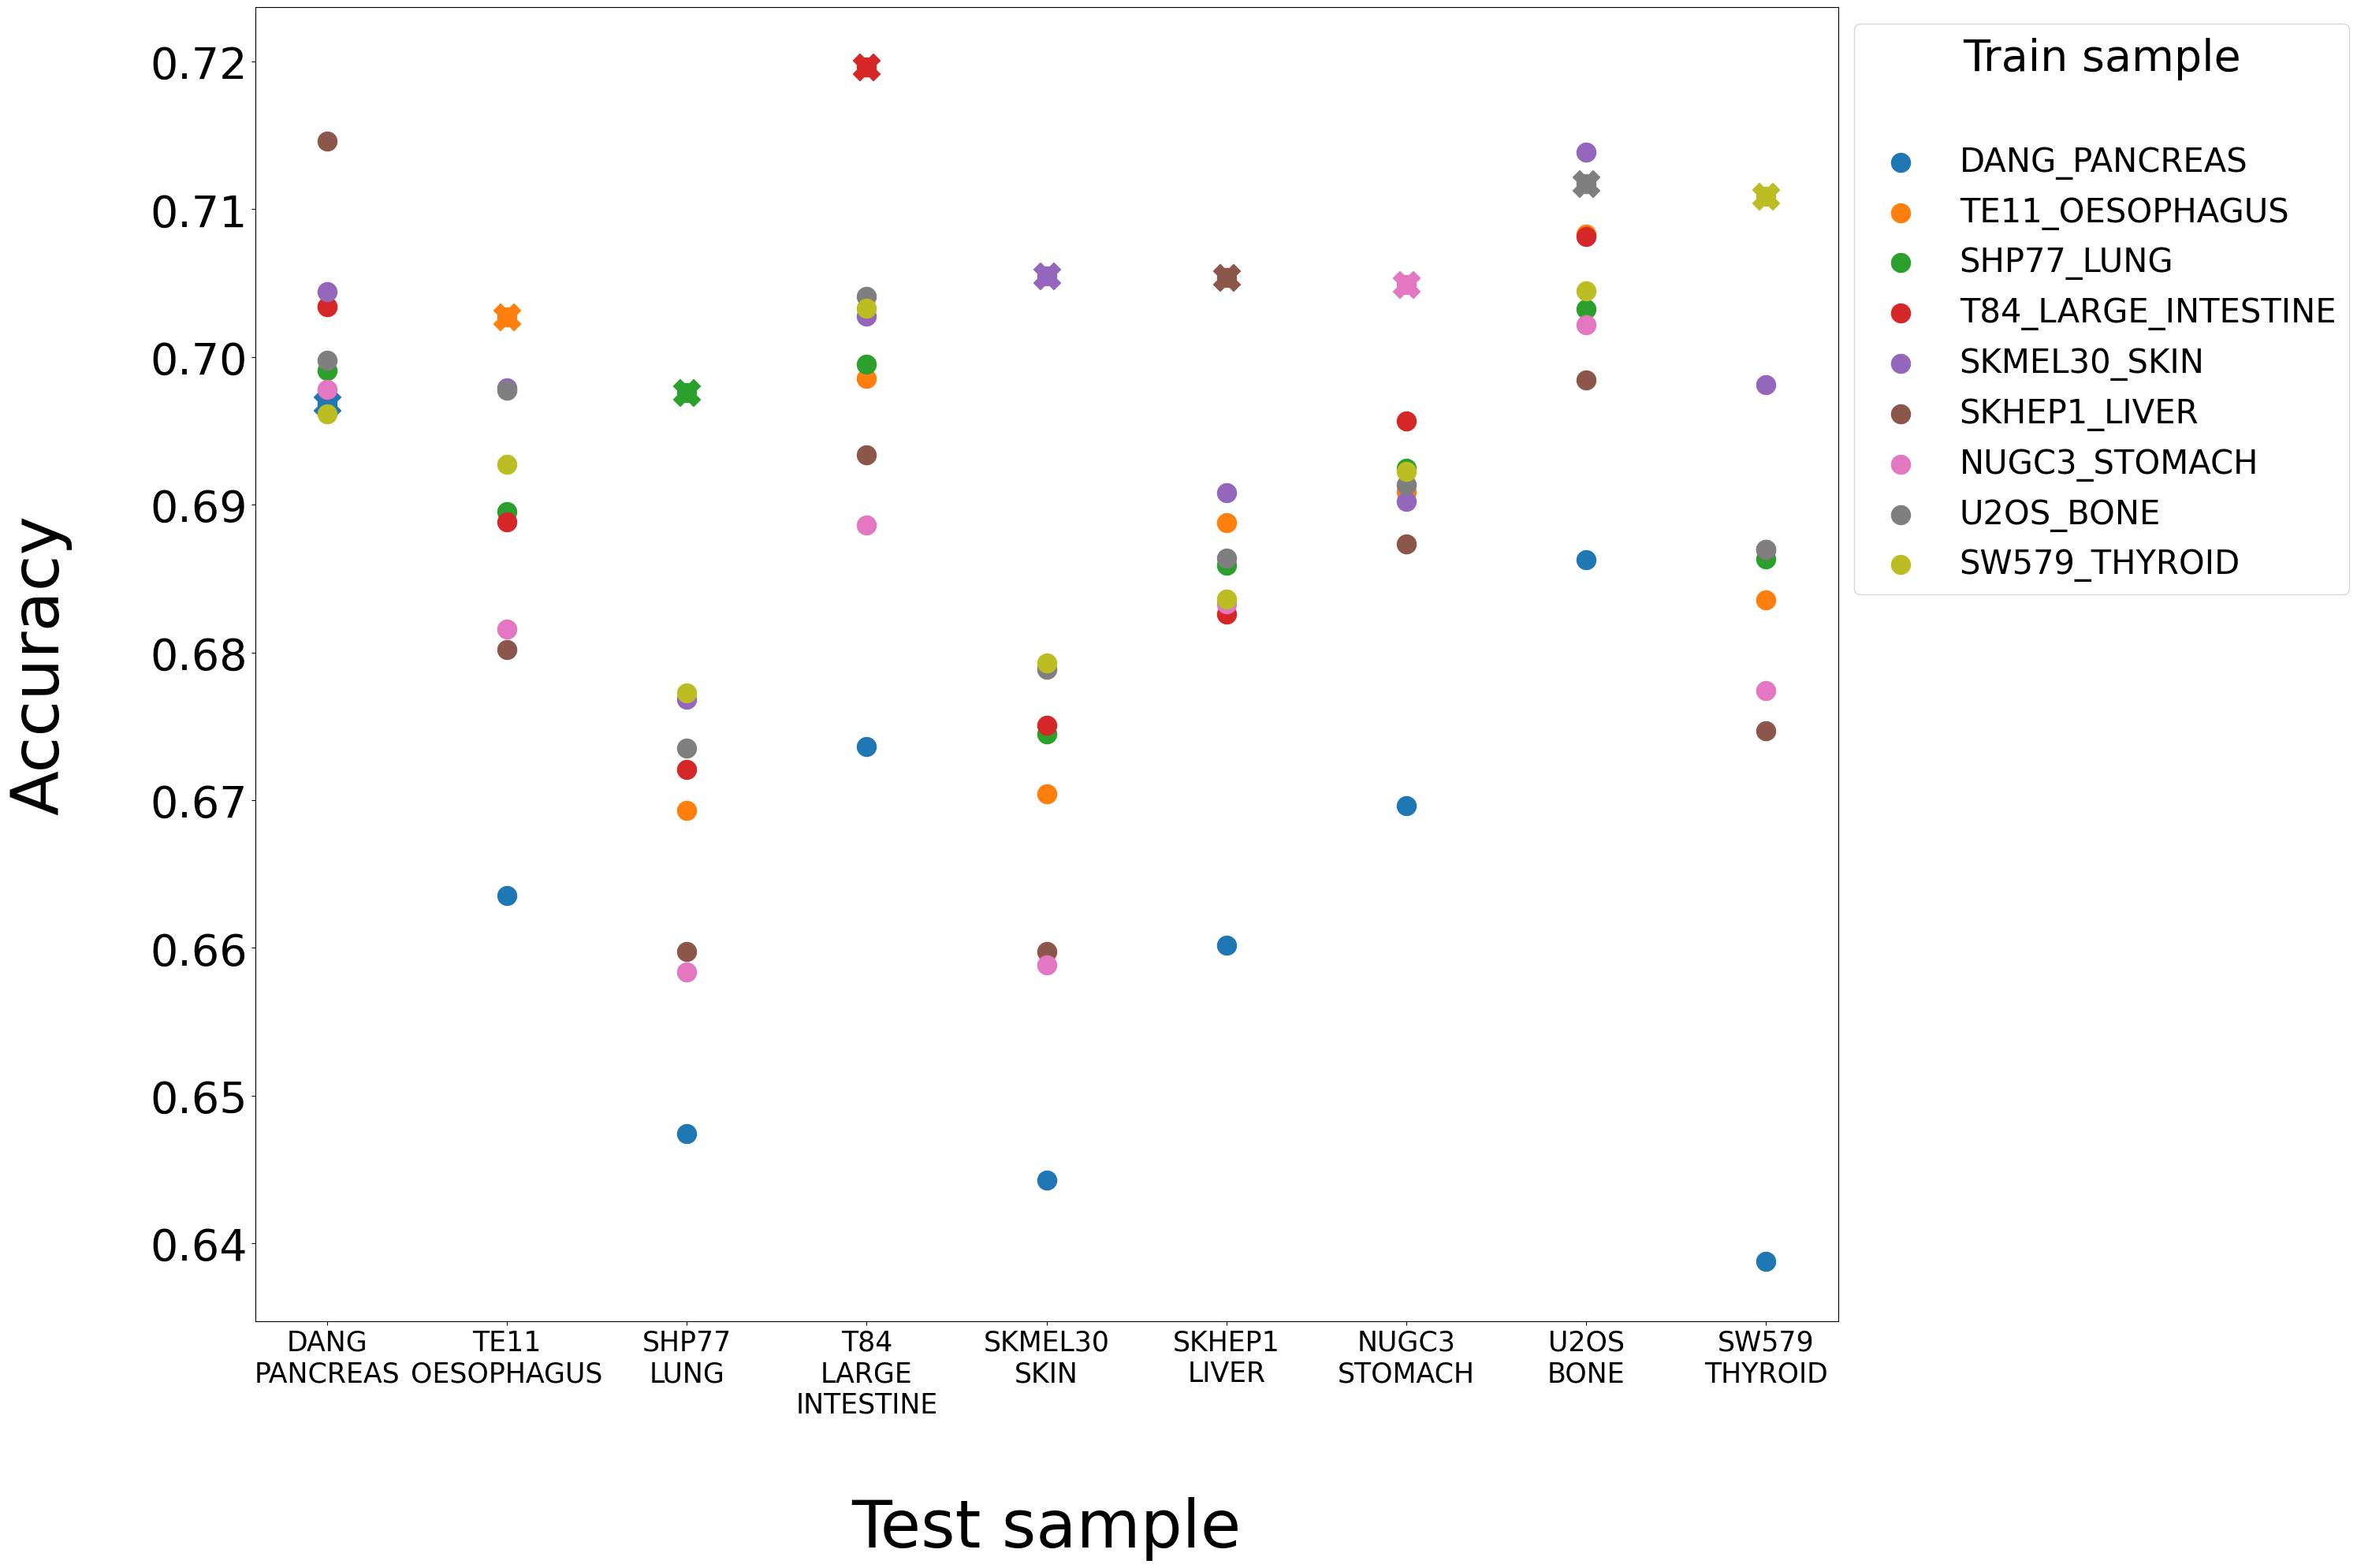

In [365]:
plt.figure(figsize=(30,20))
for i in range(9):
    plt.scatter(cancer_types_space,accuracy[i][:9],label=cancer_types[i],color="C"+str(i),s=300)
    plt.scatter(cancer_types_space[i],accuracy[i][i],marker="X",color="C"+str(i),s=600)

plt.legend(bbox_to_anchor=(1.0, 1.0),title="Train sample\n",fontsize=30,title_fontsize=40)

plt.xlabel("\nTest sample",fontsize=60)
plt.ylabel("Accuracy\n",fontsize=60)

plt.tight_layout()

plt.xticks(fontsize=25)
plt.yticks(fontsize=40)
plt.tight_layout()
plt.savefig("Validation.pdf",dpi=500)


plt.show()

# Thresholding

In [366]:
def threshold(y_prob,threshold):
    y=[]
    for i in y_prob:
        if i<threshold:
            y.append(0.0)
        else:
            y.append(1.0)
    return y

In [418]:
j1=0
p_threshold=[]
accuracy_final=[]
for file_train in filenames:
    
    
    accuracy=[]
    j2=0
    x,y=take_data_preprocess(file_train,cancer_types[j1])
    print(filenames[0])
    x=StandardScaler().fit_transform(x)

    clf = RandomForestClassifier(class_weight='balanced', max_depth=20 , n_estimators=800) 

    clf.fit(x,y)
    
    p_=[]
    
    for file_test in filenames:
        
        
        if file_test!=file_train:
        
            acc=[]

            originalclass = []
            predictedclass = []


            x_test,y_test=take_full_data_preprocess(file_test,cancer_types[j2])
            x_test=StandardScaler().fit_transform(x_test)


            originalclass=y_test
            predictedprob=clf.predict_proba(x_test)

            p=len(np.where(y_test==0.0)[0])/(len(x_test))

            print(file_test,p)

            p_.append(p)

            for t in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,p]:

                predictedclass=threshold(predictedprob[:,1],t)
                acc.append(accuracy_score(originalclass, predictedclass))

            accuracy.append(acc)
            p_threshold.append(p_)
            
            j2+=1
            
        else:    
            j2+=1
            
    accuracy_final.append(accuracy)
    j1+=1

/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv 0.6222270869819031
/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv 0.6539956803455723
/project/ReadStatistics-data/cancer_processing/SRR8670673/FinalFile.csv 0.652449567723343
/project/ReadStatistics-data/cancer_processing/SRR8670680/FinalFile.csv 0.6458136320651778
/project/ReadStatistics-data/cancer_processing/SRR8670683/FinalFile.csv 0.6151851318253854
/project/ReadStatistics-data/cancer_processing/SRR8670697/FinalFile.csv 0.622280054941083
/project/ReadStatistics-data/cancer_processing/SRR8670721/FinalFile.csv 0.5786644029428409
/project/ReadStatistics-data/cancer_processing/SRR8670670/FinalFile.csv 0.7146575057255882
/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv
/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv 0.6418389166072701
/project/ReadStatistics-data/cancer_pro

In [411]:
p=[0.6418389166072701,0.6222270869819031, 0.6539956803455723, 0.652449567723343,0.6458136320651778,0.6151851318253854,0.622280054941083,0.5786644029428409,0.7146575057255882]

In [422]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


# Define colors for each cancer type
colors = ["C" + str(i) for i in range(len(cancer_types))]

# Create custom legend
legend_handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', markersize=10, label=cancer_types[i]) for i in range(len(cancer_types))]

In [423]:
len(accuracy_final),len(accuracy)

(9, 8)

In [424]:
p_threshold

[[0.6222270869819031,
  0.6539956803455723,
  0.652449567723343,
  0.6458136320651778,
  0.6151851318253854,
  0.622280054941083,
  0.5786644029428409,
  0.7146575057255882],
 [0.6222270869819031,
  0.6539956803455723,
  0.652449567723343,
  0.6458136320651778,
  0.6151851318253854,
  0.622280054941083,
  0.5786644029428409,
  0.7146575057255882],
 [0.6222270869819031,
  0.6539956803455723,
  0.652449567723343,
  0.6458136320651778,
  0.6151851318253854,
  0.622280054941083,
  0.5786644029428409,
  0.7146575057255882],
 [0.6222270869819031,
  0.6539956803455723,
  0.652449567723343,
  0.6458136320651778,
  0.6151851318253854,
  0.622280054941083,
  0.5786644029428409,
  0.7146575057255882],
 [0.6222270869819031,
  0.6539956803455723,
  0.652449567723343,
  0.6458136320651778,
  0.6151851318253854,
  0.622280054941083,
  0.5786644029428409,
  0.7146575057255882],
 [0.6222270869819031,
  0.6539956803455723,
  0.652449567723343,
  0.6458136320651778,
  0.6151851318253854,
  0.622280054941

---
---
---
---
---
---
---
---


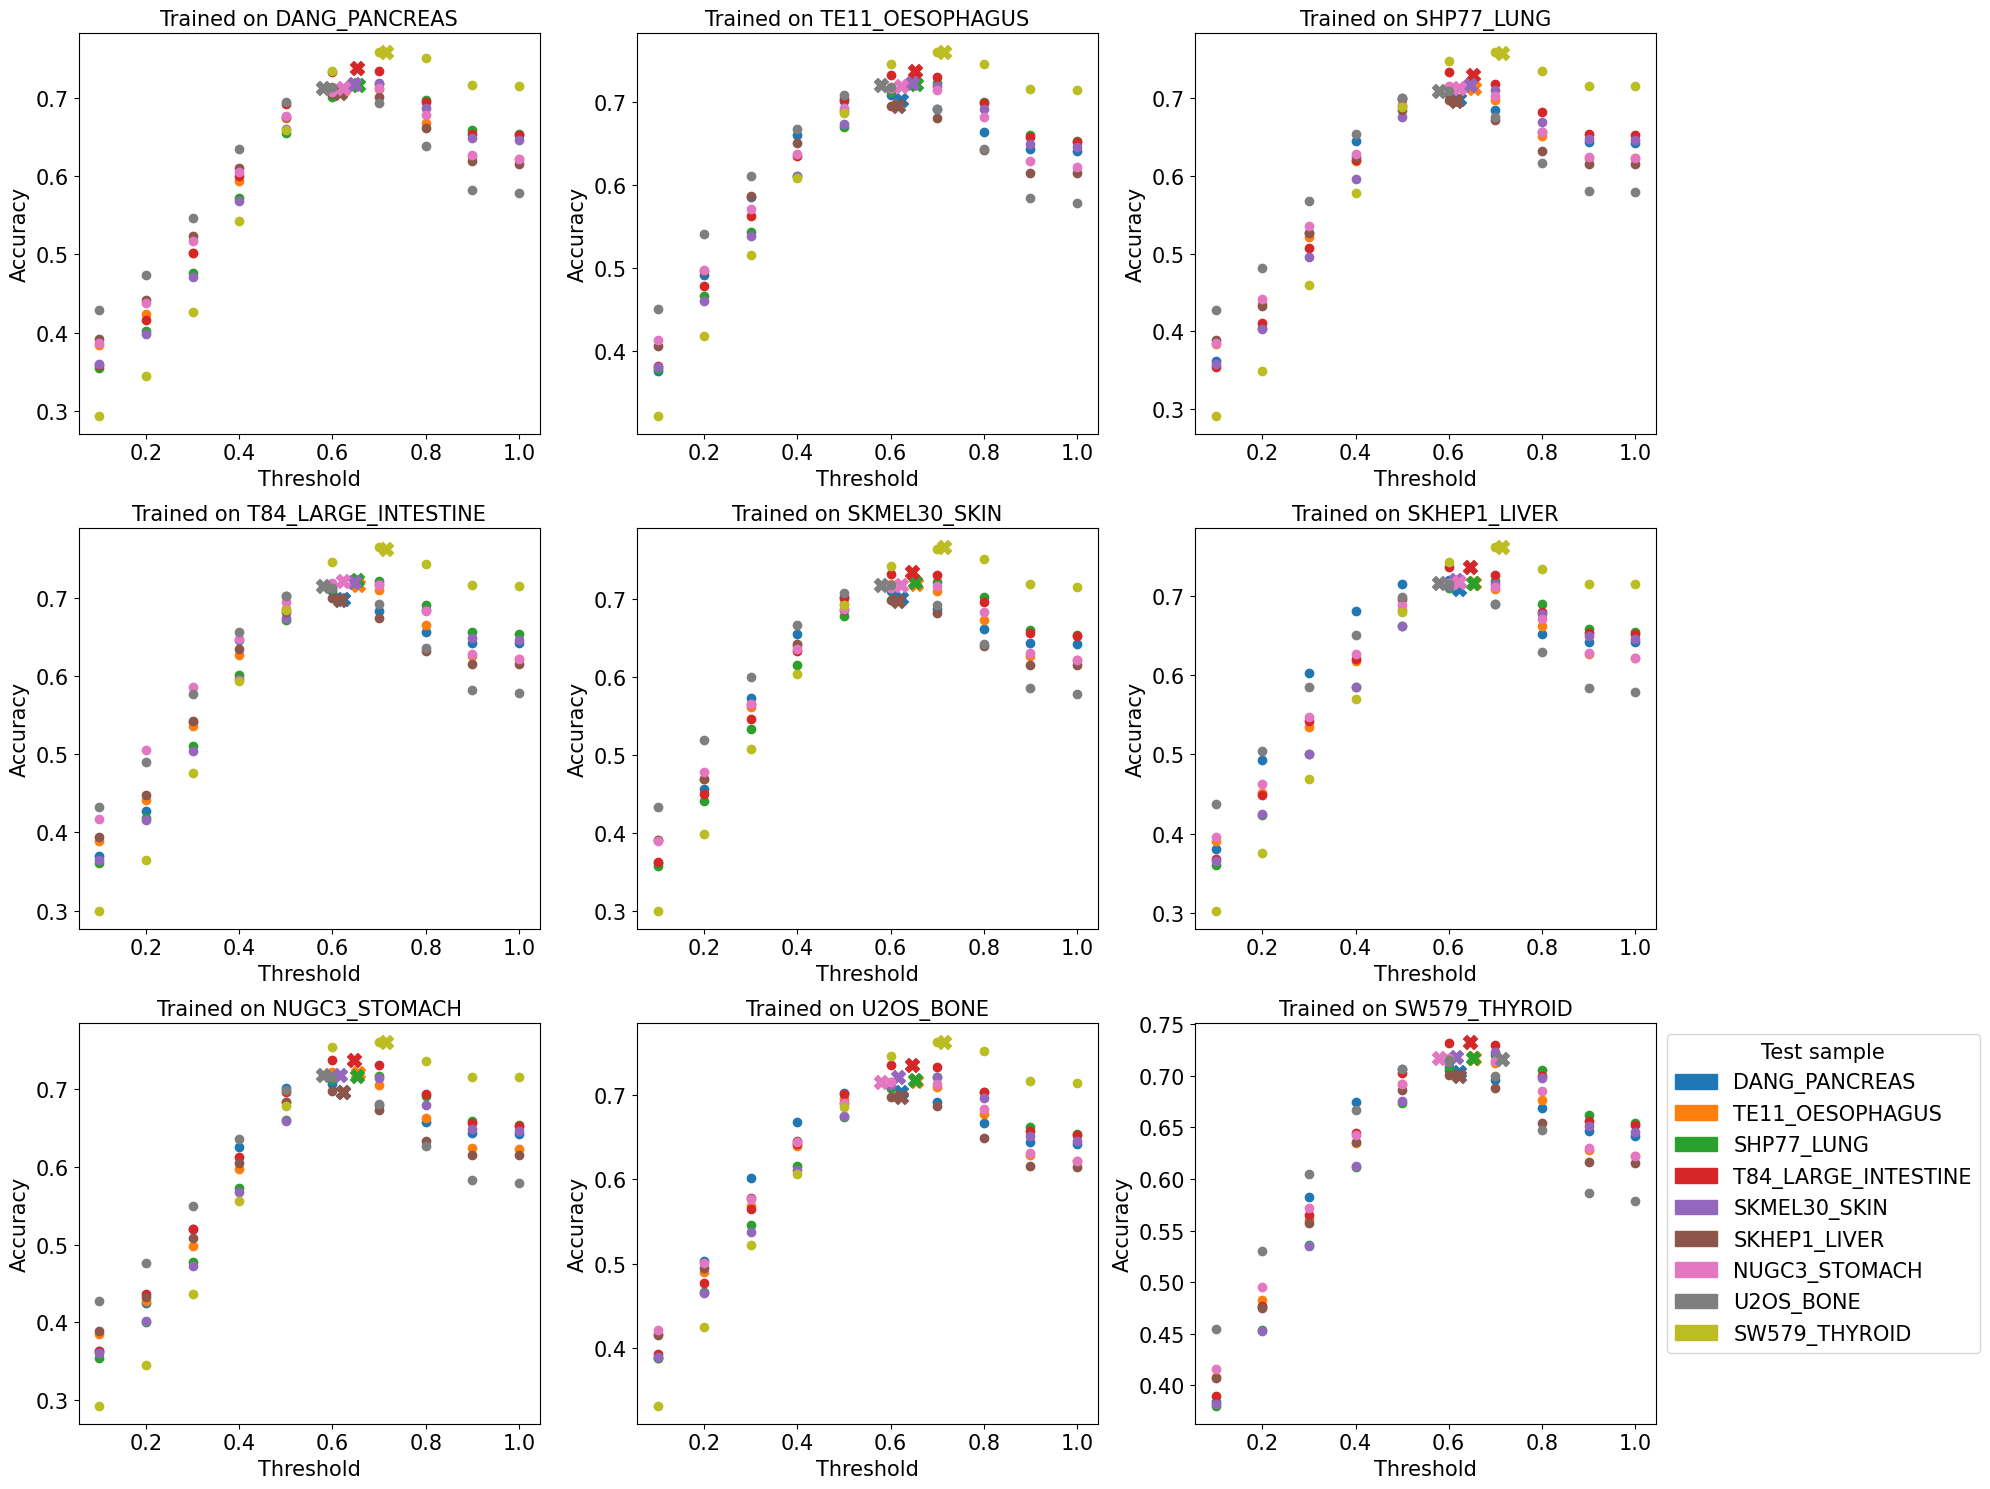

In [425]:
plt.subplots(3,3,figsize=(20,15))
idx=1
for accuracy in accuracy_final:
    j=0
    plt.subplot(3,3,idx)
    plt.title("Trained on "+cancer_types[idx-1],fontsize=15)
    for i in range(8):
        if i == idx-1:
            j+=1
        if cancer_types[j] == "SW579_THYROID":
            print("---")
        plt.scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],accuracy[i][:-1],label=cancer_types[j],color="C"+str(j))
        plt.scatter(p_threshold[j][i],np.array(accuracy)[:,-1][i],marker="X",s=100,color="C"+str(j))
        j+=1
    plt.xlabel("Threshold",fontsize=15)
    plt.ylabel("Accuracy",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    idx+=1
plt.legend(handles =  legend_patches, bbox_to_anchor=(1.0, 1.0),fontsize=15,title_fontsize=15,title="Test sample")
plt.tight_layout()

plt.savefig("/project/ReadStatistics/ML_Cancer_multiple/thresholding.png",dpi=800)

plt.show()